In [7]:
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from C:\Users\shlok\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\shlok\AppData\Local\Temp\tmp69tci4ic
  JVM stdout: C:\Users\shlok\AppData\Local\Temp\tmp69tci4ic\h2o_shlok_started_from_python.out
  JVM stderr: C:\Users\shlok\AppData\Local\Temp\tmp69tci4ic\h2o_shlok_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.9
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_shlok_2nrgpa
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [8]:
data = h2o.import_file("insurance_revised.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
data.shape

(1338, 7)

In [5]:
data.head()

age,sex,bmi,children,smoker,region,charges
19,0,27.9,0,1,4,16884.9
18,1,33.77,1,0,3,1725.55
28,1,33,3,0,3,4449.46
33,1,22.705,0,0,2,21984.5
32,1,28.88,0,0,2,3866.86
31,0,25.74,0,0,3,3756.62
46,0,33.44,1,0,3,8240.59
37,0,27.74,3,0,2,7281.51
37,1,29.83,2,0,1,6406.41
60,0,25.84,0,0,2,28923.1


In [6]:
data.describe()

Rows:1338
Cols:7




,age,sex,bmi,children,smoker,region,charges
type,int,int,real,int,int,int,real
mins,18.0,0.0,15.96,0.0,0.0,1.0,1121.8739
mean,39.20702541106125,0.5052316890881914,30.663396860986524,1.0949177877429015,0.20478325859491778,2.5156950672645735,13270.422265141255
maxs,64.0,1.0,53.13,5.0,1.0,4.0,63770.42801
sigma,14.049960379216147,0.500159569284377,6.098186911679012,1.205492739781914,0.4036940375456173,1.10488491858269,12110.011236693992
zeros,0,662,0,574,1064,0,0
missing,0,0,0,0,0,0,0
0,19.0,0.0,27.9,0.0,1.0,4.0,16884.924
1,18.0,1.0,33.77,1.0,0.0,3.0,1725.5523
2,28.0,1.0,33.0,3.0,0.0,3.0,4449.462


In [7]:
data.columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [9]:
# Define features (or predictors) manually
features =['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [10]:
# Split the H2O data frame into training/test sets
# so we can evaluate out-of-bag performance
data_split = data.split_frame(ratios = [0.9], seed = 1234)

data_train = data_split[0] # using 90% for training
data_test = data_split[1]  # using the rest 10% for out-of-bag evaluation

In [10]:
data_train.shape

(1207, 7)

In [11]:
data_test.shape

(131, 7)

In [12]:
data_train

age,sex,bmi,children,smoker,region,charges
19,0,27.9,0,1,4,16884.9
18,1,33.77,1,0,3,1725.55
28,1,33,3,0,3,4449.46
32,1,28.88,0,0,2,3866.86
31,0,25.74,0,0,3,3756.62
46,0,33.44,1,0,3,8240.59
37,0,27.74,3,0,2,7281.51
37,1,29.83,2,0,1,6406.41
25,1,26.22,0,0,1,2721.32
62,0,26.29,0,1,3,27808.7


## Generalized Linear Model

In [13]:
#Setting Parameters for grid search
hyper_parameters = { 'alpha': [0.01,0.1,0.3,0.5,0.7,0.9], 
                     'lambda': [1e-4,1e-5,1e-6,1e-7,1e-8] }

search_criteria = { 'strategy': "RandomDiscrete", 'seed': 42,
                    'stopping_metric': "AUTO", 
                    'stopping_tolerance': 0.001,
                    'stopping_rounds': 2 }

In [14]:
# Build a Generalized Linear Model (GLM) with default settings

# Import the function for GLM
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch


glm_gridSearch = H2OGridSearch(H2OGeneralizedLinearEstimator(model_id = 'glm_hyperParam', family='poisson', nfolds=5),
                               hyper_parameters, 
                               grid_id="glm_gridSearch", 
                               search_criteria=search_criteria)

In [15]:
glm_girdSearch_fit = glm_gridSearch.train(x = features,
                                         y = 'charges',
                                         training_frame = data_train)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [16]:
glm_gridPerformance = glm_gridSearch.get_grid(sort_by='mse', decreasing=True)

In [17]:
glm_gridPerformance2 = glm_gridSearch.get_grid(sort_by='r2', decreasing=True)

In [18]:
print(glm_gridPerformance)

       alpha    lambda                model_ids                   mse
0      [0.9]  [1.0E-8]  glm_gridSearch_model_16   3.784105403680041E7
1      [0.5]  [1.0E-8]  glm_gridSearch_model_21   3.740442650011666E7
2      [0.5]  [1.0E-4]  glm_gridSearch_model_23   3.734338330843134E7
3      [0.1]  [1.0E-4]  glm_gridSearch_model_17   3.733000792434925E7
4      [0.7]  [1.0E-5]  glm_gridSearch_model_11    3.72168540929851E7
5      [0.1]  [1.0E-8]   glm_gridSearch_model_7  3.7210066171807274E7
6      [0.7]  [1.0E-7]   glm_gridSearch_model_9   3.712078385998471E7
7      [0.7]  [1.0E-4]  glm_gridSearch_model_25   3.711827452321806E7
8     [0.01]  [1.0E-4]   glm_gridSearch_model_2   3.706251178286966E7
9      [0.3]  [1.0E-6]   glm_gridSearch_model_5   3.703886357686174E7
10     [0.9]  [1.0E-7]   glm_gridSearch_model_3   3.702251518276792E7
11     [0.5]  [1.0E-5]  glm_gridSearch_model_22   3.700449829239779E7
12     [0.3]  [1.0E-4]  glm_gridSearch_model_12  3.6997602179189235E7
13     [0.1]  [1.0E-

In [19]:
print(glm_gridPerformance2)

       alpha    lambda                model_ids                  r2
0      [0.3]  [1.0E-7]   glm_gridSearch_model_0  0.7546477957344109
1     [0.01]  [1.0E-8]   glm_gridSearch_model_1  0.7545736649498955
2      [0.9]  [1.0E-6]  glm_gridSearch_model_13  0.7545091150716328
3     [0.01]  [1.0E-6]   glm_gridSearch_model_6  0.7543697926918573
4      [0.7]  [1.0E-6]  glm_gridSearch_model_26  0.7535295315403577
5      [0.9]  [1.0E-4]  glm_gridSearch_model_15  0.7534057582483275
6      [0.5]  [1.0E-6]  glm_gridSearch_model_27  0.7532811754437192
7      [0.3]  [1.0E-5]  glm_gridSearch_model_18  0.7531927706268292
8      [0.3]  [1.0E-8]  glm_gridSearch_model_20  0.7531800920544505
9     [0.01]  [1.0E-7]  glm_gridSearch_model_14  0.7528114046951706
10     [0.1]  [1.0E-5]  glm_gridSearch_model_10  0.7524312623662056
11     [0.9]  [1.0E-5]   glm_gridSearch_model_8  0.7522802940600686
12     [0.5]  [1.0E-7]  glm_gridSearch_model_19  0.7521107685847785
13     [0.1]  [1.0E-7]   glm_gridSearch_model_4 

## Distributed Random Forest

In [20]:
# DRF hyperparameters
drf_params = {'mtries': [2, 4, 6] }

In [21]:
# Build a Distributed Random Forest (DRF) model with default settings

# Import the function for DRF
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [22]:
drf_gridSearch = H2OGridSearch(H2ORandomForestEstimator(seed = 1234, model_id = 'drf_hyperParam'), 
                                   hyper_params = drf_params,
                                   search_criteria = {'strategy': "Cartesian"}, 
                                   grid_id = "drf_gridSearch" )

In [25]:
drf_gridSearch.train(x = features, y = 'charges', training_frame = data_train)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [26]:
drf_gridPerformance = drf_gridSearch.get_grid(sort_by='r2', decreasing=True)

In [27]:
drf_gridPerformance

    mtries               model_ids                  r2
0        2  drf_gridSearch_model_0  0.8307252488500709
1        4  drf_gridSearch_model_1  0.8229664848864364
2        6  drf_gridSearch_model_2  0.8207937589334898


## Gradient Boosting Machines

In [30]:
# Import H2O Grid Search:
from h2o.grid.grid_search import H2OGridSearch

# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [29]:
# GBM hyperparameters
gbm_params = {'learn_rate': [0.01, 0.1], 
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

In [30]:
gbm_gridSearch = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params)
gbm_gridSearch.train(x=features, y='charges', 
                training_frame=data_train, 
                ntrees=100,
                seed=1)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [31]:
gbm_gridPerf = gbm_gridSearch.get_grid(sort_by='r2', decreasing=True)

In [32]:
gbm_gridPerf

     col_sample_rate learn_rate max_depth sample_rate           model_ids  \
0                1.0        0.1         9         0.8  gbm_grid1_model_17   
1                0.5        0.1         9         1.0  gbm_grid1_model_34   
2                0.5        0.1         9         0.8  gbm_grid1_model_16   
3                1.0        0.1         9         1.0  gbm_grid1_model_35   
4                0.2        0.1         9         1.0  gbm_grid1_model_33   
5                0.2        0.1         9         0.8  gbm_grid1_model_15   
6                1.0        0.1         5         0.8  gbm_grid1_model_11   
7                0.5        0.1         5         1.0  gbm_grid1_model_28   
8                0.5        0.1         5         0.8  gbm_grid1_model_10   
9                1.0        0.1         5         1.0  gbm_grid1_model_29   
10               0.2        0.1         5         0.8   gbm_grid1_model_9   
11               0.2        0.1         5         1.0  gbm_grid1_model_27   

## Deep Learning

In [33]:
# Build a Deep Learning (Deep Neural Networks, DNN) model with default settings

# Import the function for DNN
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [34]:
# DL hyperparameters
activation_opt = ["Rectifier", "RectifierWithDropout", "Maxout", "MaxoutWithDropout"]
l1_opt = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l2_opt = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
dl_params = {'activation': activation_opt, 'l1': l1_opt, 'l2': l2_opt}

In [35]:
# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_runtime_secs': 120, 'seed':1}

In [36]:
dl_gridSearch = H2OGridSearch(model=H2ODeepLearningEstimator,
                        grid_id='dl_grid',
                        hyper_params=dl_params,
                        search_criteria=search_criteria)

In [37]:
dl_gridSearch.train(x=features, y='charges',
              training_frame=data_train,              
              hidden=[10,10],          
              search_criteria=search_criteria)


deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [39]:
dl_gridPerf = dl_gridSearch.get_grid(sort_by='r2', decreasing=True)

In [40]:
dl_gridPerf

                  activation      l1      l2          model_ids  \
0                     Maxout  1.0E-5     0.0   dl_grid_model_84   
1                     Maxout   0.001    0.01   dl_grid_model_60   
2                     Maxout     0.0   0.001   dl_grid_model_78   
3                  Rectifier  1.0E-4   0.001   dl_grid_model_36   
4                  Rectifier     0.0     0.0  dl_grid_model_104   
5                  Rectifier  1.0E-5   0.001  dl_grid_model_140   
6                     Maxout    0.01  1.0E-4   dl_grid_model_82   
7                  Rectifier    0.01     0.0   dl_grid_model_21   
8                  Rectifier  1.0E-5  1.0E-5  dl_grid_model_127   
9                     Maxout    0.01   0.001  dl_grid_model_119   
10                    Maxout  1.0E-5   0.001   dl_grid_model_35   
11                    Maxout   0.001  1.0E-4  dl_grid_model_110   
12                 Rectifier  1.0E-5  1.0E-4   dl_grid_model_49   
13                    Maxout     0.0     0.0   dl_grid_model_5

## AutoML

In [41]:
from h2o.automl import H2OAutoML

Run AutoML, stopping after 60 seconds. The max_runtime_secs argument provides a way to limit the AutoML run by time. When using a time-limited stopping criterion, the number of models train will vary between runs. If different hardware is used or even if the same machine is used but the available compute resources on that machine are not the same between runs, then AutoML may be able to train more models on one run vs another.

The test frame is passed explicitly to the leaderboard_frame argument here, which means that instead of using cross-validated metrics, we use test set metrics for generating the leaderboard.

In [42]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "Insurance_Appointment")
aml.train(y = 'charges', training_frame = data_train, leaderboard_frame = data_test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [43]:
aml2 = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "Insurance_Appointment_CV")
aml2.train(y = 'charges', training_frame = data_train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


For demonstration purposes, we will also execute a second AutoML run, this time providing the original, full dataset, df (without passing a leaderboard_frame). This is a more efficient use of our data since we can use 100% of the data for training, rather than 80% like we did above. This time our leaderboard will use cross-validated metrics.

Note: Using an explicit leaderboard_frame for scoring may be useful in some cases, which is why the option is available.

In [44]:
aml3 = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "Insurance_Appointment_full_data")
aml3.train(y = 'charges', training_frame = data)

AutoML progress: |████████████████████████████████████████████████████████| 100%


## Leaderboard

Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the H2OAutoML.train() method for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

After viewing the "powerplant_lb_frame" AutoML project leaderboard, we compare that to the leaderboard for the "powerplant_full_data" project. We can see that the results are better when the full dataset is used for training.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance. In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

In [45]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_0_AutoML_20181027_123216_model_54,1.13756e+07,3372.77,1.13756e+07,2096.05,0.353928
GBM_grid_0_AutoML_20181027_123216_model_21,1.20766e+07,3475.15,1.20766e+07,2142.98,0.363244
GBM_grid_0_AutoML_20181027_123216_model_31,1.21575e+07,3486.77,1.21575e+07,2227.47,0.403044
GBM_grid_0_AutoML_20181027_123216_model_52,1.24557e+07,3529.26,1.24557e+07,2244.21,0.393175
GBM_grid_0_AutoML_20181027_123216_model_28,1.28733e+07,3587.93,1.28733e+07,2327.65,0.384389
GBM_grid_0_AutoML_20181027_123216_model_43,1.29534e+07,3599.08,1.29534e+07,2344.52,0.379596
GBM_grid_0_AutoML_20181027_123216_model_45,1.33297e+07,3650.99,1.33297e+07,2273.3,0.389622
GBM_grid_0_AutoML_20181027_123216_model_1,1.3341e+07,3652.53,1.3341e+07,2409.54,0.416542
GBM_grid_0_AutoML_20181027_123216_model_23,1.361e+07,3689.17,1.361e+07,2301.27,0.397381
GBM_grid_0_AutoML_20181027_123216_model_46,1.36954e+07,3700.72,1.36954e+07,2526.09,0.444603


Now we will view a snapshot of the top models. Here we should see the two Stacked Ensembles at or near the top of the leaderboard. Stacked Ensembles can almost always outperform a single model.

In [46]:
aml2.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_0_AutoML_20181027_123404_model_31,2.24506e+07,4738.21,2.24506e+07,2725.46,0.456319
GBM_grid_0_AutoML_20181027_123404_model_54,2.25127e+07,4744.75,2.25127e+07,2704.39,0.441204
GBM_grid_0_AutoML_20181027_123404_model_28,2.43348e+07,4933.03,2.43348e+07,3003.43,0.458959
GBM_grid_0_AutoML_20181027_123404_model_23,2.44006e+07,4939.7,2.44006e+07,2930.57,0.475415
GBM_grid_0_AutoML_20181027_123404_model_21,2.45335e+07,4953.13,2.45335e+07,2814.64,0.479546
GBM_grid_0_AutoML_20181027_123404_model_45,2.45823e+07,4958.05,2.45823e+07,2891.94,0.490887
GBM_grid_0_AutoML_20181027_123404_model_43,2.4623e+07,4962.16,2.4623e+07,2990.04,0.459616
GBM_grid_0_AutoML_20181027_123404_model_6,2.50316e+07,5003.16,2.50316e+07,3317.03,0.514075
GBM_grid_0_AutoML_20181027_123404_model_36,2.52922e+07,5029.14,2.52922e+07,2971.72,nan
GBM_grid_0_AutoML_20181027_123404_model_10,2.54806e+07,5047.83,2.54806e+07,3058.74,0.488135


In [47]:
aml3.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_0_AutoML_20181027_123608_model_54,1.96475e+07,4432.55,1.96475e+07,2415.68,0.390348
GBM_grid_0_AutoML_20181027_123608_model_31,1.99015e+07,4461.11,1.99015e+07,2476.01,0.416367
GBM_grid_0_AutoML_20181027_123608_model_45,2.05282e+07,4530.8,2.05282e+07,2521.15,0.430383
GBM_grid_0_AutoML_20181027_123608_model_21,2.1118e+07,4595.43,2.1118e+07,2524.27,0.424965
GBM_grid_0_AutoML_20181027_123608_model_43,2.11722e+07,4601.32,2.11722e+07,2654.21,0.416275
GBM_grid_0_AutoML_20181027_123608_model_28,2.14511e+07,4631.53,2.14511e+07,2687.13,0.415292
GBM_grid_0_AutoML_20181027_123608_model_23,2.14946e+07,4636.23,2.14946e+07,2653.48,0.435689
GBM_grid_0_AutoML_20181027_123608_model_52,2.17847e+07,4667.41,2.17847e+07,2584.01,0.425546
GBM_grid_0_AutoML_20181027_123608_model_6,2.18274e+07,4671.99,2.18274e+07,2990.47,0.479888
GBM_grid_0_AutoML_20181027_123608_model_36,2.19706e+07,4687.28,2.19706e+07,2660.98,0.442723


## Predict Using Leader Model
If you need to generate predictions on a test set, you can make predictions on the "H2OAutoML" object directly, or on the leader model object.

In [48]:
pred = aml.predict(data_test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
4385.37
14647.9
11442.7
38811.7
15281.1
6662.94
41836.6
7341.91
16732.6
16862


In [49]:
pred = aml2.predict(data_test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
4773.82
14191.7
12350.9
38920.1
14238.1
6538.02
40923.3
7269.51
17975.8
16290.8


In [50]:
pred = aml3.predict(data_test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
4829.55
13716.8
11020.4
37656
15257.3
6023.81
41927.9
5353.16
16381.1
16456.8


In [24]:
h2o.cluster().shutdown()

H2O session _sid_93fe closed.


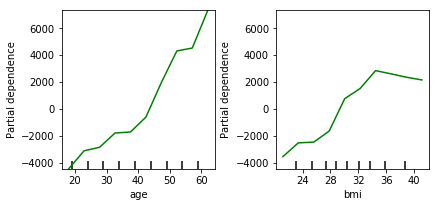

In [7]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

cols_to_use = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

def get_some_data():
   data = pd.read_csv('insurance_revised.csv')
   y = data.charges
   X = data[cols_to_use]
   my_imputer = Imputer()
   imputed_X = my_imputer.fit_transform(X)
   return imputed_X, y


X, y = get_some_data()
my_model = GradientBoostingRegressor()
my_model.fit(X, y)
my_plots = plot_partial_dependence(my_model,
                                  features=[0,2],
                                  X=X,
                                  feature_names=cols_to_use,
                                  grid_resolution=10)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn import cross_validation, metrics   
import matplotlib.pyplot as plt
import numpy as np

C:\Users\shlok\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('insurance_revised.csv')
cols_to_use = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
y = df.charges
X = df[cols_to_use]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
rf1.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [5]:
imp=rf1.feature_importances_
imp
features=X.columns

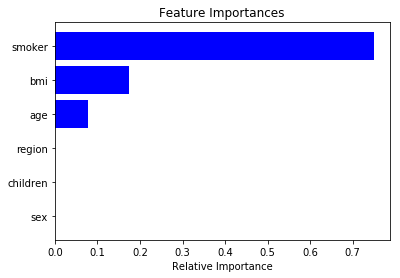

In [6]:
indices = np.argsort(imp)

plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [11]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
drf_default = H2ORandomForestEstimator(model_id = 'drf_default',seed =1234)

In [12]:
data_split = data.split_frame(ratios = [0.9], seed = 1234)

data_train = data_split[0] # using 90% for training
data_test = data_split[1]
drf_default.train(x= features, y= 'charges', training_frame= data_train)


drf Model Build progress: |███████████████████████████████████████████████| 100%


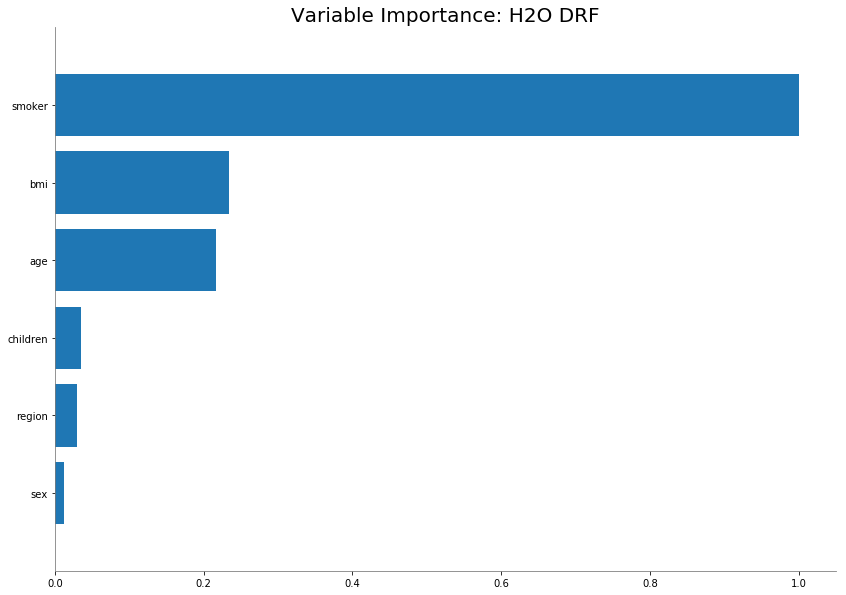

In [13]:
drf_default.varimp_plot()

In [14]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_default = H2OGradientBoostingEstimator(model_id = 'gbm_default',seed =1234)

In [15]:
gbm_default.train(x= features, y= 'charges', training_frame= data_train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


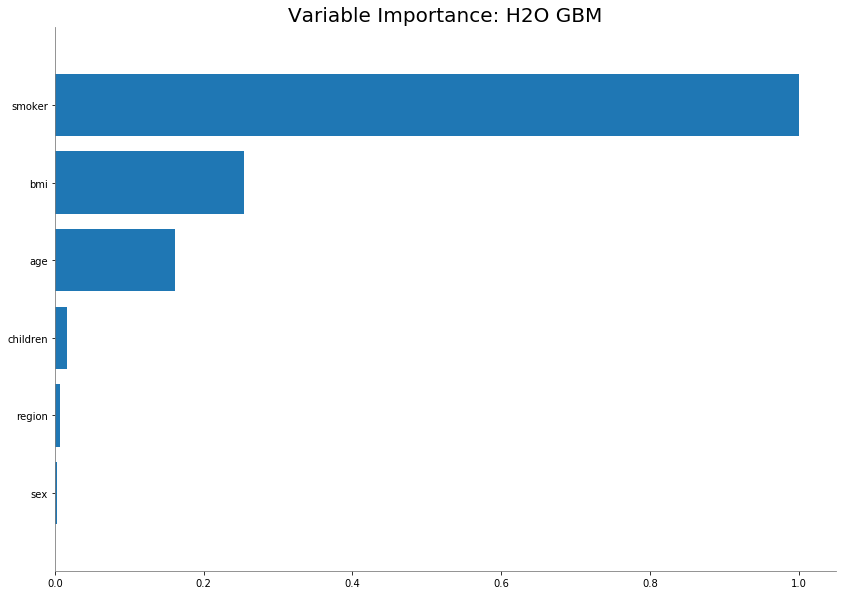

In [16]:
gbm_default.varimp_plot()

In [17]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
dnn_default = H2ODeepLearningEstimator(model_id='dnn_default', seed =1234)

In [18]:
dnn_default.train(x= features, y= 'charges', training_frame= data_train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


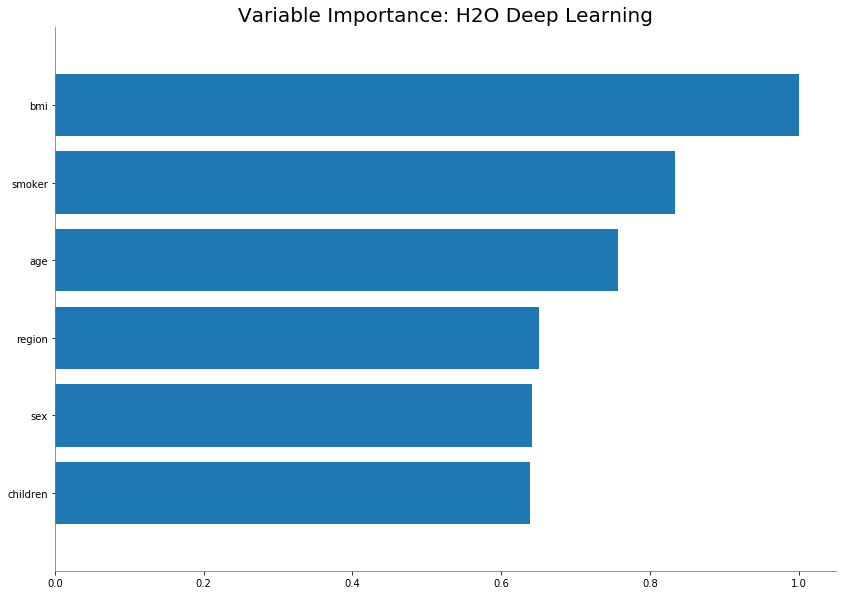

In [19]:
dnn_default.varimp_plot()

In [20]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
gle_default = H2OGeneralizedLinearEstimator(model_id='dnn_default', seed =1234)

In [21]:
gle_default.train(x= features, y= 'charges', training_frame= data_train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


Variable importance does not apply to GLM. Will use std_coef_plot() instead.


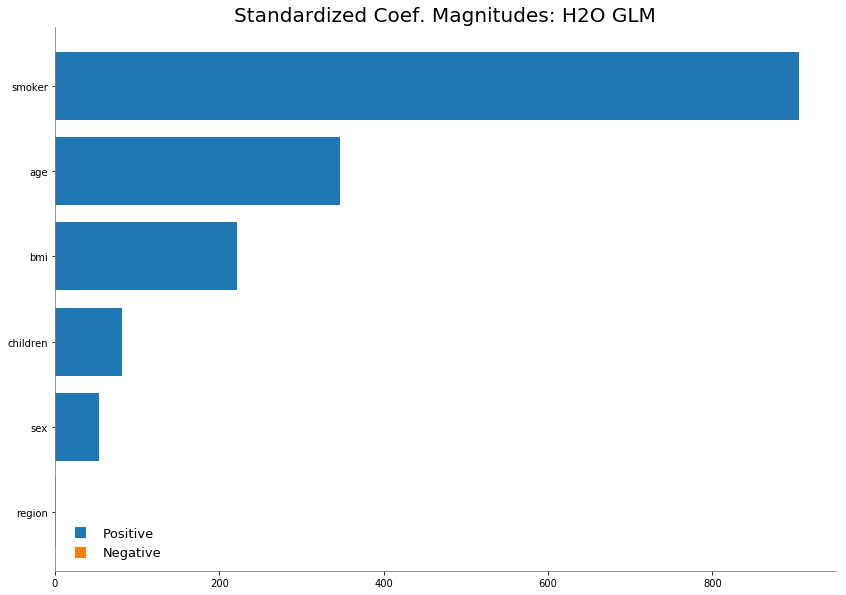

In [23]:
gle_default.varimp_plot()

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_profiling
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
sns.set_style("whitegrid")

C:\Users\shlok\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\shlok\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\shlok\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\shlok\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\shlok\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\shlok\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Users\shl

In [26]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Checking for missing values

In [27]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Number of people who are smokers

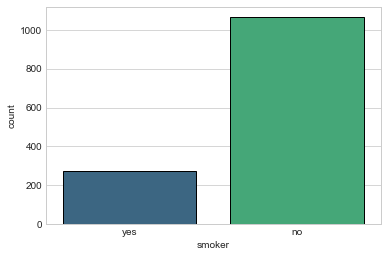

In [28]:
sns.countplot(x='smoker',data=df,palette='viridis')

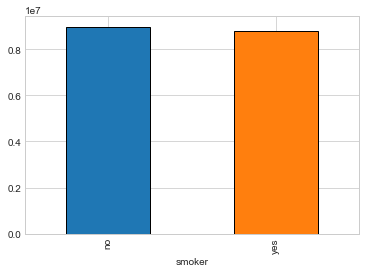

In [29]:
by_smoker = df.groupby('smoker').charges.sum()
by_smoker.plot(kind='bar')

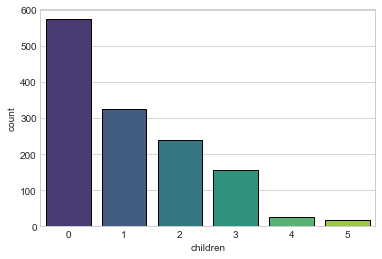

In [30]:
sns.countplot(x='children',data=df,palette='viridis')

### Gender Count according to Region

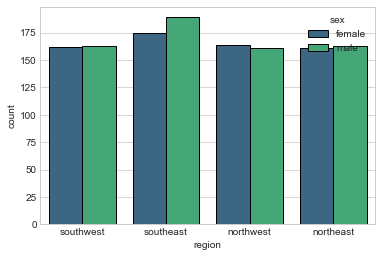

In [31]:
sns.countplot(x='region',data=df,hue='sex',palette='viridis')

### Health Insurance Charges according to Region

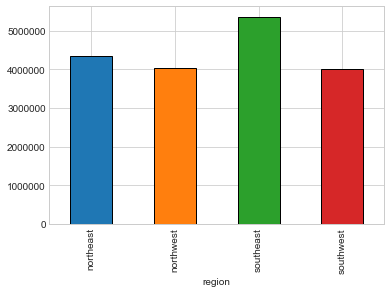

In [32]:
by_region = df.groupby('region').charges.sum()
by_region.plot(kind='bar')

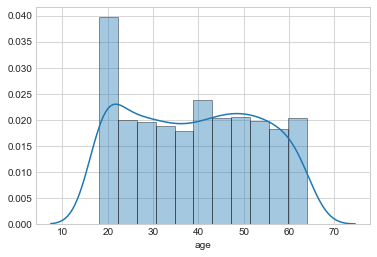

In [33]:
sns.distplot(df['age'])

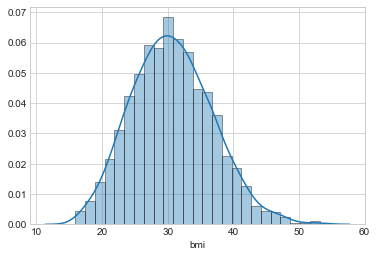

In [34]:
sns.distplot(df['bmi'])

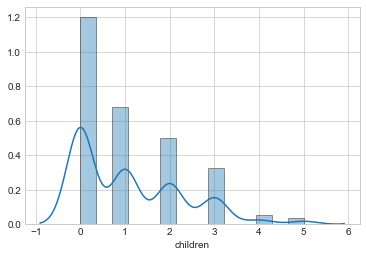

In [35]:
sns.distplot(df['children'])

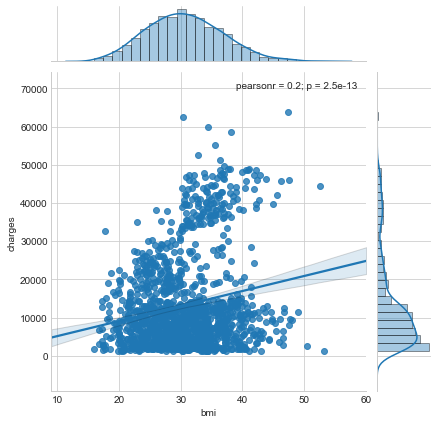

In [36]:
sns.jointplot(x='bmi',y='charges',data=df,kind='reg')

In [41]:
Underweight = df[df["bmi"] < 18.5].bmi.count()
Normal = df[(df["bmi"] > 18.5) & (df["bmi"] < 24.9)].bmi.count()
Overweight = df[(df["bmi"] > 25) & (df["bmi"] < 29.9)].bmi.count()
Obese = df[df["bmi"] > 30].bmi.count()

bmi = pd.DataFrame({'Category':['Underweight','Normal','Overweight', 'Obese'],'Values':[Underweight,Normal,Overweight,Obese]})
bmi

,Category,Values
0,Underweight,20
1,Normal,221
2,Overweight,372
3,Obese,705


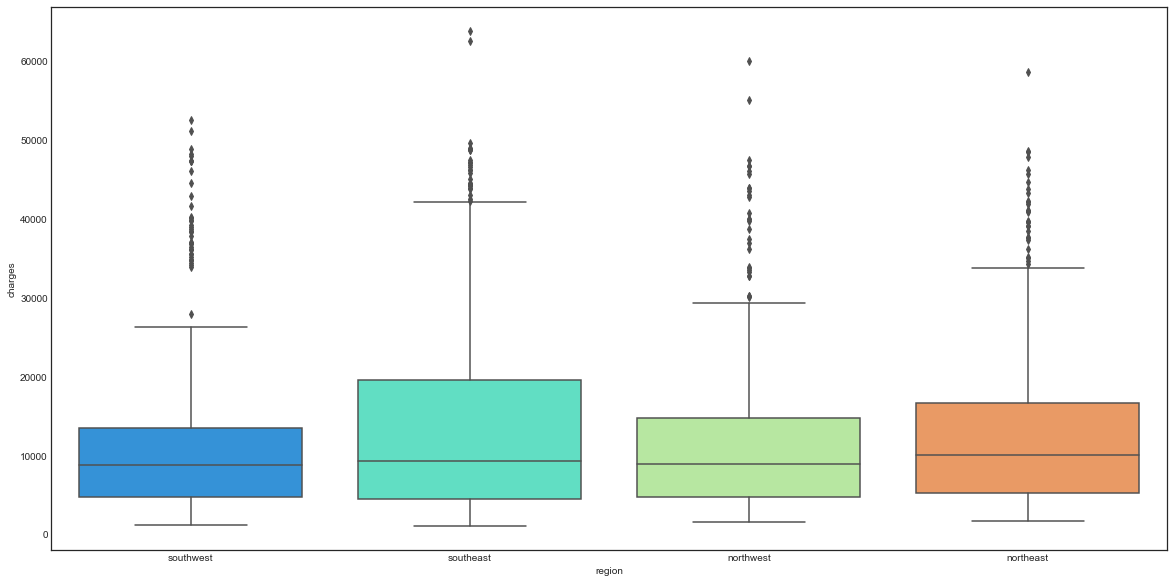

In [43]:
fig = plt.figure(1, figsize=(20, 10))
sns.set_style('white')
ax = sns.boxplot(x="region", y="charges", data=df, palette='rainbow')

### As we can observe, region of origin doesn’t have much impact with the amount of medical cost.

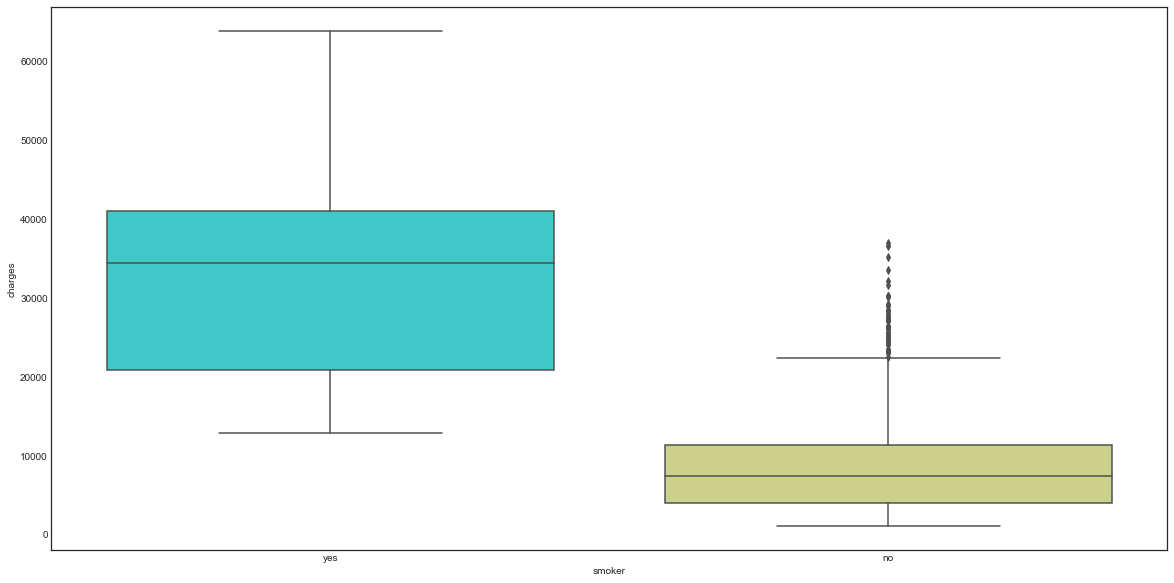

In [44]:
fig = plt.figure(1, figsize=(20, 10))
sns.set_style('white')
ax = sns.boxplot(x="smoker", y="charges", data=df, palette='rainbow')

### On the other hand, the same cannot be said with smoking status. It can be clearly deceived that smokers spends a lot more in medical expenses compared to non-smokers by almost 4x.